# [Install pycocotools](https://github.com/ildoonet/tf-pose-estimation/issues/458)
- step 1: While executing requirements.txt file remove pycocotools and proceed with rest of the installation.
- step 2: Run command -> pip install --upgrade cython
- step 3: Use this link to clone the recent coco module: https://github.com/philferriere/cocoapi
(git clone https://github.com/philferriere/cocoapi )

- step 4: cd cocoapi/PythonAPI/
- step 5: python setup.py install

In [ ]:
# !pip install --upgrade cython
# !git clone https://github.com/philferriere/cocoapi 
# !cd cocoapi/PythonAPI/
# !python setup.py install
# !sudo rm -fr ../../../cocoapi

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import json
import glob
import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [2]:
coco = COCO("pascal_train.json") # load training annotations

loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [3]:
coco.cats # check the category

{1: {'supercategory': 'aeroplane', 'name': 'aeroplane', 'id': 1},
 2: {'supercategory': 'bicycle', 'name': 'bicycle', 'id': 2},
 3: {'supercategory': 'bird', 'name': 'bird', 'id': 3},
 4: {'supercategory': 'boat', 'name': 'boat', 'id': 4},
 5: {'supercategory': 'bottle', 'name': 'bottle', 'id': 5},
 6: {'supercategory': 'bus', 'name': 'bus', 'id': 6},
 7: {'supercategory': 'car', 'name': 'car', 'id': 7},
 8: {'supercategory': 'cat', 'name': 'cat', 'id': 8},
 9: {'supercategory': 'chair', 'name': 'chair', 'id': 9},
 10: {'supercategory': 'cow', 'name': 'cow', 'id': 10},
 11: {'supercategory': 'diningtable', 'name': 'diningtable', 'id': 11},
 12: {'supercategory': 'dog', 'name': 'dog', 'id': 12},
 13: {'supercategory': 'horse', 'name': 'horse', 'id': 13},
 14: {'supercategory': 'motorbike', 'name': 'motorbike', 'id': 14},
 15: {'supercategory': 'person', 'name': 'person', 'id': 15},
 16: {'supercategory': 'pottedplant', 'name': 'pottedplant', 'id': 16},
 17: {'supercategory': 'sheep', 'n

In [4]:
image_ids = []
imgs_keys = list(coco.imgs.keys())

for i in imgs_keys:
    image_ids.append (coco.imgs[i]['file_name'][:-4])
#image_ids

# Extract Annotations from Pascal VOC 2012 trainval dataset
## Tiny VOC 2012 dataset only contains 1349 images

In [ ]:
## Make sure the path is correct.

# !wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# !tar xvf VOCtrainval_11-May-2012.tar

In [ ]:
Annotations = os.listdir('./VOCdevkit/VOC2012/Annotations')
counts = 0
for file in (Annotations):
    if file[:-4] not in image_ids:
        try:
            os.remove('./VOCdevkit/VOC2012/Annotations/'+str(file))
        except OSError as e:
            print(e)
        counts +=1
counts
    #print(str(file[:-4]))

In [ ]:
Class = os.listdir('./VOCdevkit/VOC2012/SegmentationClass')
counts = 0
for file in (Class):
    if file[:-4] not in image_ids:
        try:
            os.remove('./VOCdevkit/VOC2012/SegmentationClass/'+str(file))
        except OSError as e:
            print(e)
        counts +=1
counts
    #print(str(file[:-4]))

In [ ]:
Object = os.listdir('./VOCdevkit/VOC2012/SegmentationObject')
counts = 0
for file in (Object):
    if file[:-4] not in image_ids:
        try:
            os.remove('./VOCdevkit/VOC2012/SegmentationObject/'+str(file))
        except OSError as e:
            print(e)
        counts +=1
counts
    #print(str(file[:-4]))

In [ ]:
image = os.listdir('./VOCdevkit/VOC2012/JPEGImages')
counts = 0
for file in (image):
    if file[:-4] not in image_ids:
        try:
            os.remove('./VOCdevkit/VOC2012/JPEGImages/'+str(file))
        except OSError as e:
            print(e)
        counts +=1
counts
    #print(str(file[:-4]))

# Rename the VOCdevkit directory as VOCdevkit_Tiny
# Rename the VOCdevkit_Tiny/VOC2012/JPEGImages as train_images

In [ ]:
#!mv VOCdevkit/ VOCdevkit_Tiny
#!mv VOCdevkit_Tiny/JPEGImages/VOC2012/JPEGImages/ train_images

# Create training data label
*You have to create the validation data by your own*

In [ ]:
train_label = open('./VOCdevkit_Tiny/VOC2012/train.txt', 'w')
for i in sorted(image_ids):
    train_label.write(i+'\n')
#test.write(str(image_ids))
train_label.close()

In [5]:
imgIds = 5 # Use the key above to retrieve information of the image
img_info = coco.loadImgs(ids=imgIds)
print(img_info)

[{'file_name': '2007_000129.jpg', 'id': 5, 'height': 500, 'width': 334}]


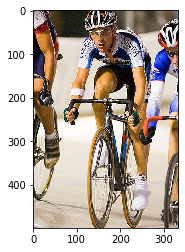

In [6]:
image = cv2.imread('./VOCdevkit_Tiny/VOC2012/train_images/'+ str(img_info[-1]['file_name']))
image = image[:,:,::-1] # BGR -> RGB
plt.imshow(image)

# Get VOC_Tiny dataset Image RGB mean

In [7]:
a = 0
for i in image_ids:
    image = plt.imread('./VOCdevkit_Tiny/VOC2012/train_images/'+ str(i) + '.jpg')
    a = np.mean(image,axis=(0,1)) + a
    #plt.figure()
    #plt.imshow(image)
a / len(image_ids)

array([116.9003786 , 112.24963049, 102.58990664])

In [8]:
# Use the imgIds to find all instance ids of the image
annids = coco.getAnnIds(imgIds=imgIds)
print(annids)

[9, 10, 11, 12, 13, 14]


In [9]:
anns = coco.loadAnns(annids)
print("Number of instances: ", len(annids))

Number of instances:  6


In [10]:
instance_id = 0
print(anns[instance_id].keys()) # check the information of the first instance of the image

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])


In [11]:
print("Polygons of segmenatation:      ", anns[instance_id]['segmentation'][0][:18])
print("Image id of this instance:      ", anns[instance_id]['image_id'])
print("Bounding box of this instance:  ", anns[instance_id]['bbox'])
print("Category_id:                    ", anns[instance_id]['category_id'])

Polygons of segmenatation:       [90, 257, 88, 259, 89, 260, 89, 261, 91, 263, 92, 263, 94, 261, 93, 260, 93, 259]
Image id of this instance:       5
Bounding box of this instance:   [79, 203, 173, 297]
Category_id:                     2


# Visualization

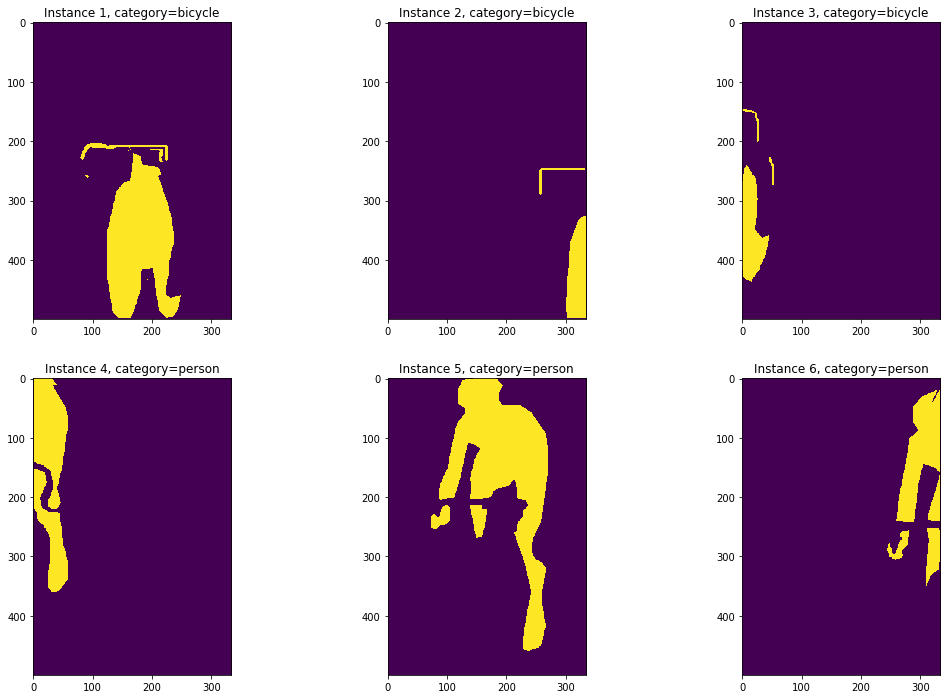

In [12]:
plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i in range(len(annids)):
    mask = coco.annToMask(anns[i])
    cate = anns[i]['category_id']
    plt.subplot(2, 3, i+1)
    plt.title("Instance {}, category={}".format(i+1, coco.cats[cate]['name']))
    plt.imshow(mask)